In [4]:
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
from nltk.help import upenn_tagset


In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [6]:
from tqdm import tqdm

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
def show_wordcloud(text):
    wordcloud = WordCloud(background_color = 'white').generate(text)
    plt.figure(figsize = (10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [10]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
from nltk import word_tokenize

In [16]:
import string

from nltk import word_tokenize
from nltk import pos_tag

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = list(stopwords.words('english'))
punctuation_translator = str.maketrans('', '', string.punctuation)


def remove_punctuation(s):
    return s.translate(punctuation_translator)



def preprocess_text(s, tokenizer=None, remove_stopwords=True, remove_punctuation=True,
                    stemmer=None, lemmatizer=None, lowercase=True, return_type='str'):
    # Throw an error if both stemmer and lemmatizer are not None
    if stemmer is not None and lemmatizer is not None:
         raise ValueError("Stemmer and Lemmatizer cannot both be not None!")

    # Tokenization either with default tokenizer or user-specified tokenizer
    if tokenizer is None:
        token_list = word_tokenize(s)
    else:
        token_list = tokenizer.tokenize(s)

    # Stem or lemmatize if needed
    if lemmatizer is not None:
        token_list = lemmatize_token_list(lemmatizer, token_list)
    elif stemmer is not None:
        token_list = stem_token_list(stemmer, token_list)

    # Convert all tokens to lowercase if need
    if lowercase:
        token_list = [ token.lower() for token in token_list ]

    # Remove all stopwords if needed
    if remove_stopwords:
        token_list = [ token for token in token_list if not token in nltk_stopwords ]

    # Remove all punctuation marks if needed (note: also converts, e.g, "Mr." to "Mr")
    if remove_punctuation:
        token_list = [ ''.join(c for c in s if c not in string.punctuation) for s in token_list ]
        token_list = [ token for token in token_list if len(token) > 0 ] # Remove "empty" tokens

    if return_type == 'list':
        return token_list
    elif return_type == 'set':
        return set(token_list)
    else:
        return ' '.join(token_list)



def stem_token_list(stemmer, token_list):
    for idx, token in enumerate(token_list):
        token_list[idx] = stemmer.stem(token)
    return token_list


def lemmatize_token_list(lemmatizer, token_list):
    pos_tag_list = pos_tag(token_list)
    for idx, (token, tag) in enumerate(pos_tag_list):
        tag_simple = tag[0].lower() # Converts, e.g., "VBD" to "c"
        if tag_simple in ['n', 'v', 'j']:
            word_type = tag_simple.replace('j', 'a')
        else:
            word_type = 'n'
        lemmatized_token = lemmatizer.lemmatize(token, pos=word_type)
        token_list[idx] = lemmatized_token
    return token_list



#
# Everything below gets only executed when the file is explicitly being run
# and not when imported. This is useful for testing the functions.
#


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
sentences = ["Text processing with Python is great.",
             "It isn't (very) complicated to get started.",
             "However,careful to...you know....avoid mistakes.",
             "This is so cooool #nltkrocks :))) :-P <3."]

In [34]:
text = '.'.join(sentences)
print(text)
tweet_tokenizer=TweetTokenizer()   

Text processing with Python is great..It isn't (very) complicated to get started..However,careful to...you know....avoid mistakes..This is so cooool #nltkrocks :))) :-P <3.


In [37]:
word_tokens = tweet_tokenizer.tokenize(text)

In [41]:
porter_stemmer = PorterStemmer()
stemmed=[]
for word in word_tokens:
    stemmed.append(porter_stemmer.stem(word))



In [42]:
print(stemmed)

['text', 'process', 'with', 'python', 'is', 'great', '..', 'it', "isn't", '(', 'veri', ')', 'complic', 'to', 'get', 'start', '..', 'howev', ',', 'care', 'to', '...', 'you', 'know', '...', 'avoid', 'mistak', '..', 'thi', 'is', 'so', 'cooool', '#nltkrock', ':)', ')', ')', ':-p', '<3', '.']


In [52]:
lemmatizer =WordNetLemmatizer()
lemmatized=[]
pos_list = ['n','v','a','r']
for word in word_tokens:
    print('{}:\t'.format(word))
    for pos in pos_list:
        print(lemmatizer.lemmatize(word,pos=pos))
        

Text:	
Text
Text
Text
Text
processing:	
processing
process
processing
processing
with:	
with
with
with
with
Python:	
Python
Python
Python
Python
is:	
is
be
is
is
great:	
great
great
great
great
..:	
..
..
..
..
It:	
It
It
It
It
isn't:	
isn't
isn't
isn't
isn't
(:	
(
(
(
(
very:	
very
very
very
very
):	
)
)
)
)
complicated:	
complicated
complicate
complicated
complicated
to:	
to
to
to
to
get:	
get
get
get
get
started:	
started
start
started
started
..:	
..
..
..
..
However:	
However
However
However
However
,:	
,
,
,
,
careful:	
careful
careful
careful
careful
to:	
to
to
to
to
...:	
...
...
...
...
you:	
you
you
you
you
know:	
know
know
know
know
...:	
...
...
...
...
avoid:	
avoid
avoid
avoid
avoid
mistakes:	
mistake
mistake
mistakes
mistakes
..:	
..
..
..
..
This:	
This
This
This
This
is:	
is
be
is
is
so:	
so
so
so
so
cooool:	
cooool
cooool
cooool
cooool
#nltkrocks:	
#nltkrocks
#nltkrocks
#nltkrocks
#nltkrocks
:):	
:)
:)
:)
:)
):	
)
)
)
)
):	
)
)
)
)
:-P:	
:-P
:-P
:-P
:-P
<3:	
<3
<3
<3


In [55]:
pos_tag_list = pos_tag(word_tokens)
print(pos_tag_list)

[('Text', 'NN'), ('processing', 'NN'), ('with', 'IN'), ('Python', 'NNP'), ('is', 'VBZ'), ('great', 'JJ'), ('..', 'IN'), ('It', 'PRP'), ("isn't", 'VBZ'), ('(', '('), ('very', 'RB'), (')', ')'), ('complicated', 'VBD'), ('to', 'TO'), ('get', 'VB'), ('started', 'VBN'), ('..', 'NNP'), ('However', 'RB'), (',', ','), ('careful', 'JJ'), ('to', 'TO'), ('...', ':'), ('you', 'PRP'), ('know', 'VBP'), ('...', ':'), ('avoid', 'JJ'), ('mistakes', 'NNS'), ('..', 'VBP'), ('This', 'DT'), ('is', 'VBZ'), ('so', 'RB'), ('cooool', 'JJ'), ('#nltkrocks', 'NNS'), (':)', 'VBP'), (')', ')'), (')', ')'), (':-P', 'JJ'), ('<3', 'NN'), ('.', '.')]


In [56]:
doc = nlp(text)

In [60]:
for token in doc:
    print(token,':',token.tag_)

Text : NN
processing : NN
with : IN
Python : NNP
is : VBZ
great : JJ
.. : .
It : PRP
is : VBZ
n't : RB
( : -LRB-
very : RB
) : -RRB-
complicated : JJ
to : TO
get : VB
started : VBN
.. : .
However : RB
, : ,
careful : JJ
to : IN
... : :
you : PRP
know : VBP
.... : NFP
avoid : VB
mistakes : NNS
.. : .
This : DT
is : VBZ
so : RB
cooool : NN
# : $
nltkrocks : NNS
:))) : NFP
:-P : NFP
<3 : ADD
. : .


In [61]:
df= pd.read_csv('yelp-reviews-mon-ami-gabi.csv')
df.head()

,review_number,review
0,1,"Excellent food, great atmosphere, a bit noisy...."
1,2,If you enjoy a little people watching with you...
2,3,"affordable, fairly classic french foodsit outs..."
3,4,Though heartbroken and a bit aimless on my 22n...
4,5,"The food and wine was amazing, but the super h..."


In [62]:
reviews = df['review'].tolist()

In [64]:
print(reviews[0:2])

['Excellent food, great atmosphere, a bit noisy.  $$', "If you enjoy a little people watching with your dining, sit out on the outside terrace and watch Las Vegas tourist walk the strip as they celebrate their winnings or rave about the fabulous Bellagio fountains.  As the restaurant is directly across from the fountains, it is also a great place to dine while taking in the free show.   The food fits the setting, with a traditional French menu infused with a bit of Vegas penache.   We had excellent service..polite, prompt, helpful (great at helping us pick a great wine suited to our selections!) and personal.   And by the way,   the wait staff aren't above snapping that great snapshot of you and your guest having a good time....it is great to be a tourist!"]


In [70]:
adjectives={}
for review in reviews:
    review_tokens = nlp(review)
    for token in review_tokens:
        if token.tag_=='JJ':
            if token.text not in adjectives:
                adjectives[token.text]=1
            else:
                adjectives[token.text]+=1
    

In [72]:
print(adjectives['great'])
print(adjectives['sad'])

707
8


In [77]:
adj_list=[]
for adjective,count in adjectives.items():
    adj_list.append(adjective)

In [78]:
text = ' '.join(adj_list)

In [79]:
print(text)

Excellent great noisy little outside fabulous free traditional French excellent polite prompt helpful personal wait good affordable classic french reminiscent heartbroken aimless 22nd happy amazing super high direct numerous Yippy own bloody icky large OUTSTANDING special specific it- curious enormous delicious bad expensive crowded dim festive enjoyable big same nice steep tasty careful local Great outdoor several wonderful Worth last awesome American full favorite spectacular front fantastic thetrue wise other flat new Nice romantic worth able overpriced- only beautiful fine following few busy friendly personable moody unpredictable unkind ready why- many Other Warm fresh tomatoes- blue medium- Red amazing- ummm yummy warm sensual average Cheap disappointed decent belgian smoked bellini reasonable heavy hard extensive rare medium perfect double short OK open upbeat multiple cold leery aware simple sure allergic next loud huge fair much pricey Total generous articulate knowledgeable w

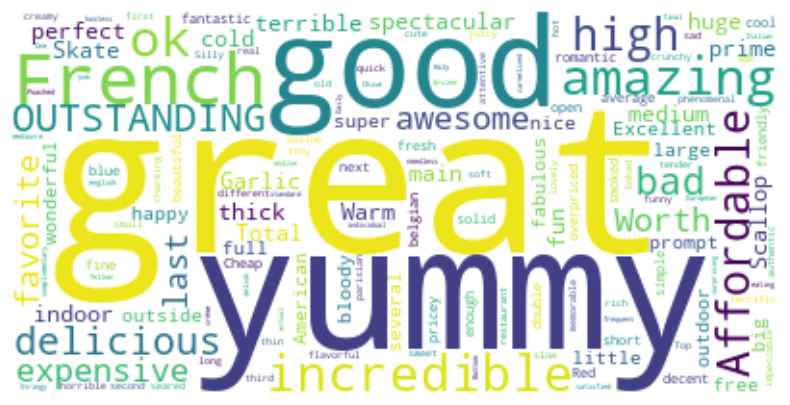

In [80]:
show_wordcloud(text)